**Дз1**

In [78]:


import pandas as pd

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

preferred = data.groupby('Customer ID')['Payment Method'].agg(lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else x.iloc[0])
total = data.groupby('Customer ID')['Total Price'].sum()
another = data.groupby('Customer ID')['Add-on Total'].sum()

result = pd.concat([preferred, total, another], axis=1)
print(result)

            Payment Method  Total Price  Add-on Total
Customer ID                                          
1000           Credit Card      6279.42         66.30
1002                  Cash      5020.60         60.16
1003                  Cash        41.50         35.56
1004           Credit Card        83.00         65.78
1005            Debit Card     11779.11         75.33
...                    ...          ...           ...
19994        Bank Transfer      5504.87         93.17
19995          Credit Card      5394.56          0.00
19996        Bank Transfer     27296.78        432.12
19997        Bank Transfer      2528.26        101.34
19998        Bank Transfer       674.32          0.00

[12136 rows x 3 columns]


**Дз2**

/tmp/ipython-input-1427152888.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['Month'] = pd.to_datetime(income['Purchase Date']).dt.to_period('M')
/tmp/ipython-input-1427152888.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income['Quarter'] = pd.to_datetime(income['Purchase Date']).dt.to_period('Q')


([0, 1, 2, 3, 4],
 [Text(0, 0, '2023Q3'),
  Text(1, 0, '2023Q4'),
  Text(2, 0, '2024Q1'),
  Text(3, 0, '2024Q2'),
  Text(4, 0, '2024Q3')])

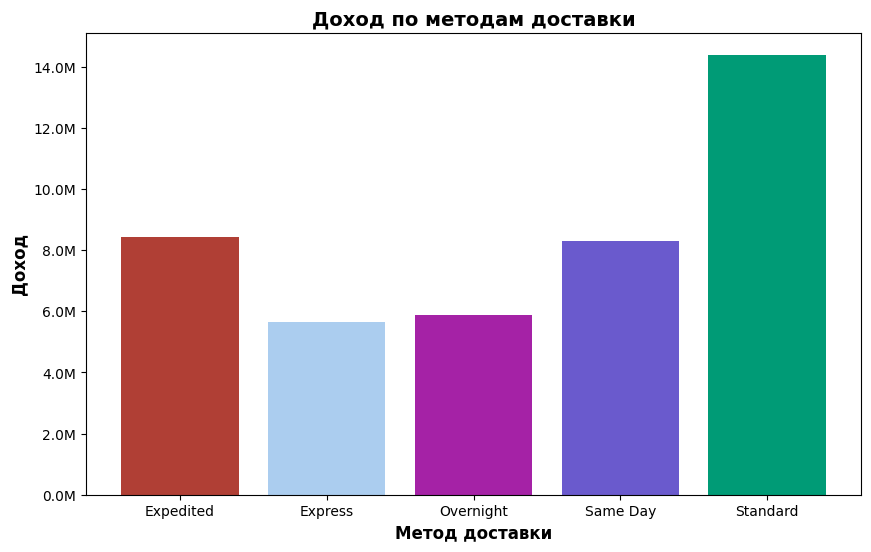

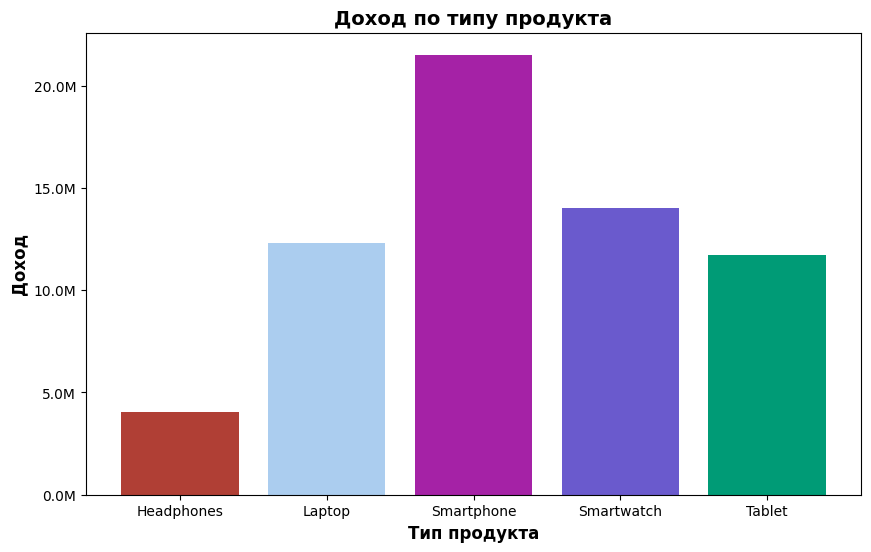

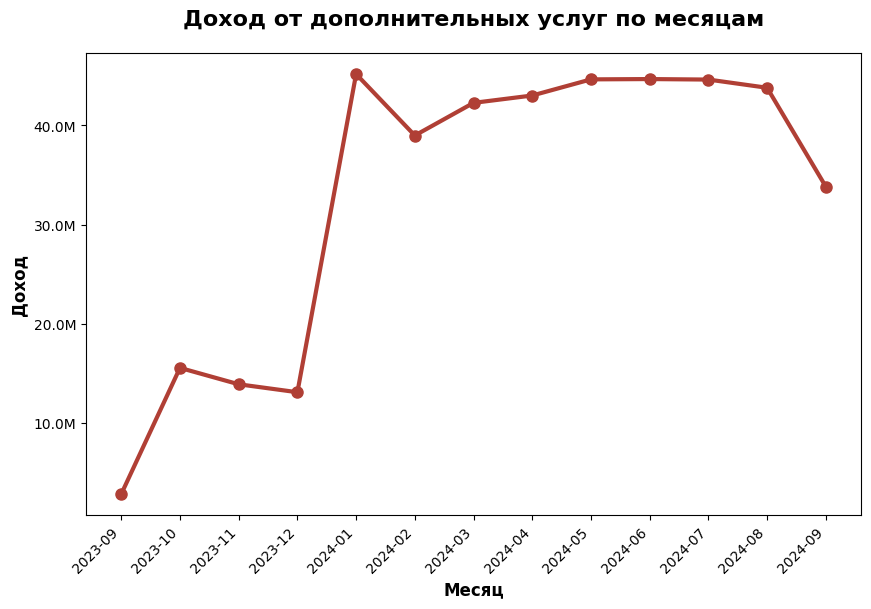

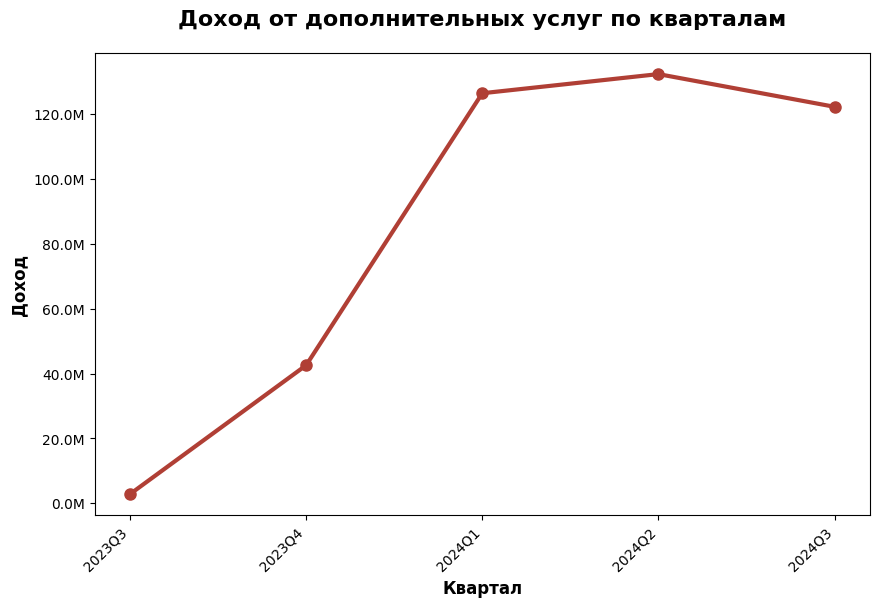

In [79]:
import matplotlib.pyplot as plt

# Доход есть только завершённые заказы
income = data[data['Order Status'] == 'Completed']

shipping = income.groupby('Shipping Type')['Total Price'].sum()

# Гистограмма дохода по методам доставки
plt.figure(figsize=(10, 6))
colors = ['#B03F35', '#ABCDEF', '#A522A6', '#6A5ACD', '#009B76']
bars = plt.bar(shipping.index, shipping.values, color=colors)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.title('Доход по методам доставки', fontsize=14, fontweight='bold')
plt.xlabel('Метод доставки', fontsize=12, fontweight='bold')
plt.ylabel('Доход', fontsize=12, fontweight='bold')

product = data.groupby('Product Type')['Total Price'].sum()

# Гистограмма дохода по методам доставки
plt.figure(figsize=(10, 6))
colors = ['#B03F35', '#ABCDEF', '#A522A6', '#6A5ACD', '#009B76']
bars = plt.bar(product.index, product.values, color=colors)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
plt.title('Доход по типу продукта', fontsize=14, fontweight='bold')
plt.xlabel('Тип продукта', fontsize=12, fontweight='bold')
plt.ylabel('Доход', fontsize=12, fontweight='bold')

income['Month'] = pd.to_datetime(income['Purchase Date']).dt.to_period('M')
another_m = income.groupby('Month')['Total Price'].sum()

# График дохода по месяцам
plt.figure(figsize=(10, 6))
months = another_m.index.astype(str)
plt.plot(months, another_m.values,
         marker='o', linewidth=3, markersize=8,
         color='#B03F35', label='Доход от услуг')
plt.title('Доход от дополнительных услуг по месяцам', fontsize=16, fontweight='bold', pad=20)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e5:.1f}M'))
plt.xlabel('Месяц', fontsize=12, fontweight='bold')
plt.ylabel('Доход', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

income['Quarter'] = pd.to_datetime(income['Purchase Date']).dt.to_period('Q')
another_q = income.groupby('Quarter')['Total Price'].sum()

# График дохода по кварталам
plt.figure(figsize=(10, 6))
quarter = another_q.index.astype(str)
plt.plot(quarter, another_q.values,
         marker='o', linewidth=3, markersize=8,
         color='#B03F35', label='Доход от услуг')
plt.title('Доход от дополнительных услуг по кварталам', fontsize=16, fontweight='bold', pad=20)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e5:.1f}M'))
plt.xlabel('Квартал', fontsize=12, fontweight='bold')
plt.ylabel('Доход', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')